In [1]:
#!pip install tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import warnings
import os

warnings.filterwarnings("ignore")

wd="C:/Users/swati/Desktop/Anaconda/"
os.chdir(wd)


### 1. Load the data

In [2]:
ion = pd.read_csv('ion.csv', index_col=0)
ion.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


### 2. Prep the data
2.1 Create train and test 

2.2 Min max scaler 

2.3 Dependant and independant variable

In [3]:
df = ion.copy()
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True)

X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

### 3. Create the DL model

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4, activation='relu', input_dim=X_train.shape[1]),
    layers.Dense(4, activation='relu'),    
    layers.Dense(1, activation='sigmoid'),
])

In [5]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [6]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

### 4. Plot results

Best Validation Loss: 0.3011
Best Validation Accuracy: 0.9048


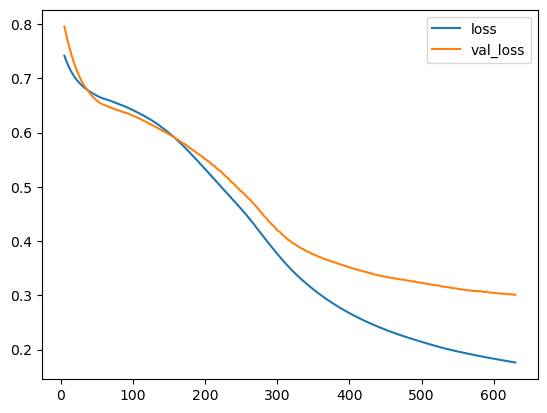

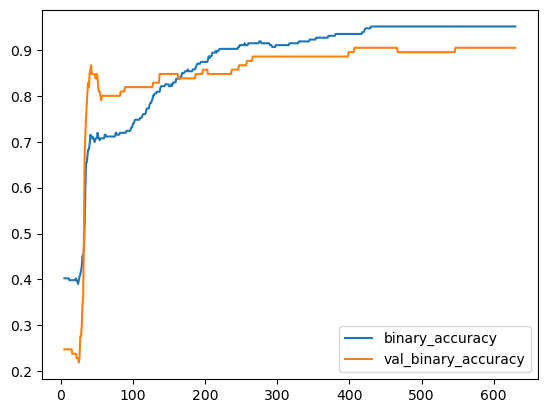

In [7]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

In [8]:
history_df = pd.DataFrame(history.history)

In [9]:
history_df.head()

,binary_accuracy,loss,val_binary_accuracy,val_loss
0,0.406504,0.762614,0.247619,0.830544
1,0.402439,0.758052,0.247619,0.823133
2,0.402439,0.753649,0.247619,0.815904
3,0.402439,0.749410,0.247619,0.808901
4,0.402439,0.745390,0.247619,0.802127


In [14]:
history_df[['binary_accuracy','loss']].agg(['mean','median','min','max','count'])

,binary_accuracy,loss
mean,0.863096,0.402208
median,0.914634,0.353762
min,0.390244,0.176162
max,0.951219,0.762614
count,631.000000,631.000000


### 5. Model scoring

In [20]:
valid_pred= model.predict(X_valid)
#train_pred= model.predict(X_train)



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [21]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_valid,valid_pred)
#roc_auc_score(y_train,train_pred)



0.8807205452775073